**Задача: Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Задачи по визуализации данных

**ЗАДАНИЕ: Нарисуйте график bar plot, показывающий количество точек для каждого значения target.**

<AxesSubplot:xlabel='target', ylabel='count'>

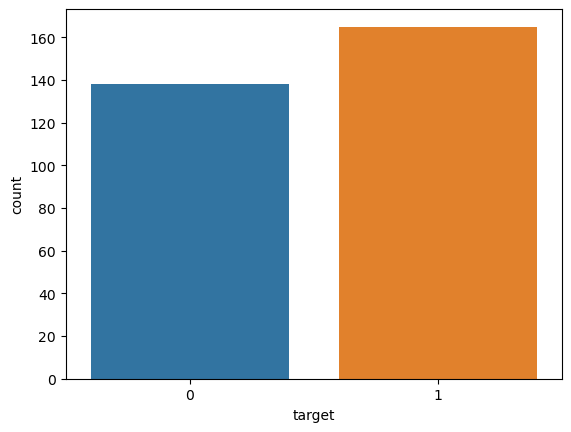

In [8]:
sns.countplot(x = 'target', data = df)

**Нарисуем график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']

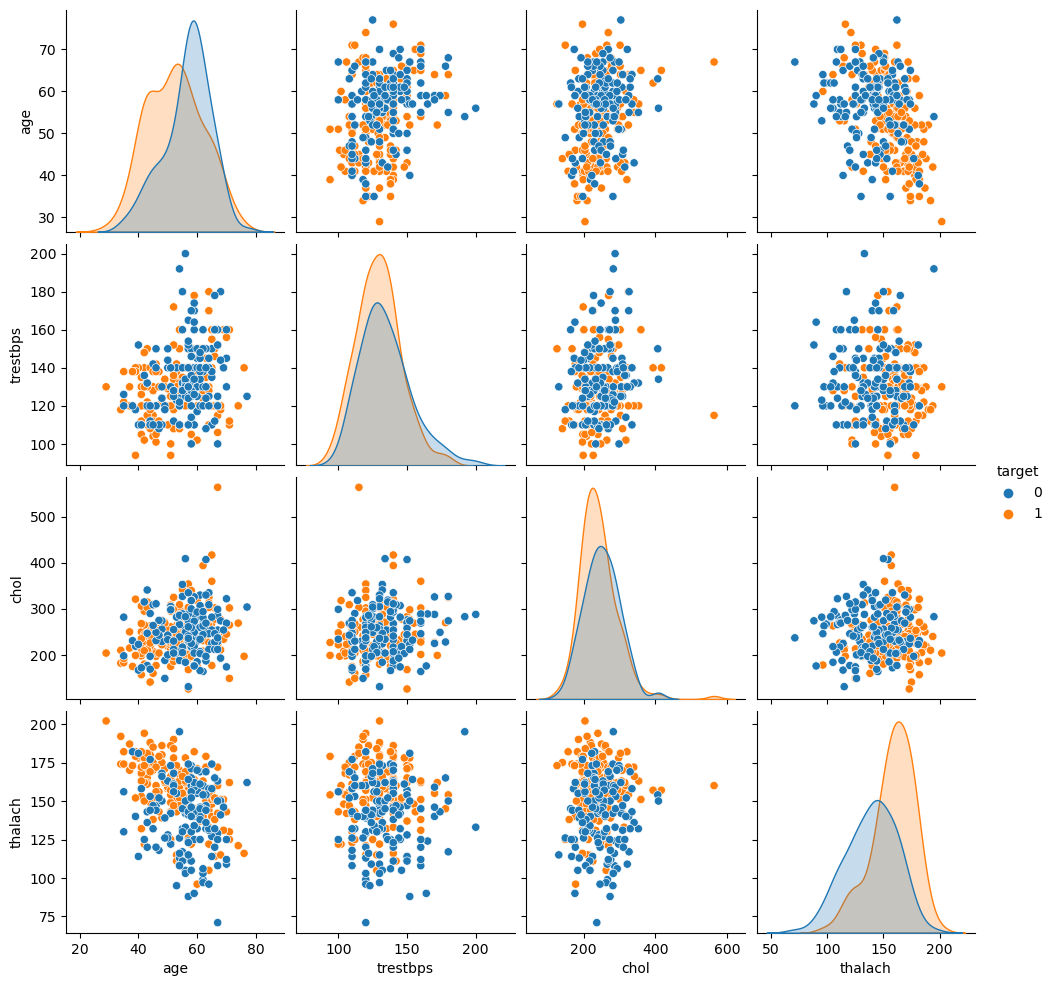

In [9]:
sns.pairplot(data = df, x_vars=['age','trestbps', 'chol','thalach'],
            y_vars= ['age','trestbps', 'chol','thalach'], hue = 'target')

**Нарисуем график heatmap, показывающий корреляции между всеми колонками.**

<AxesSubplot:>

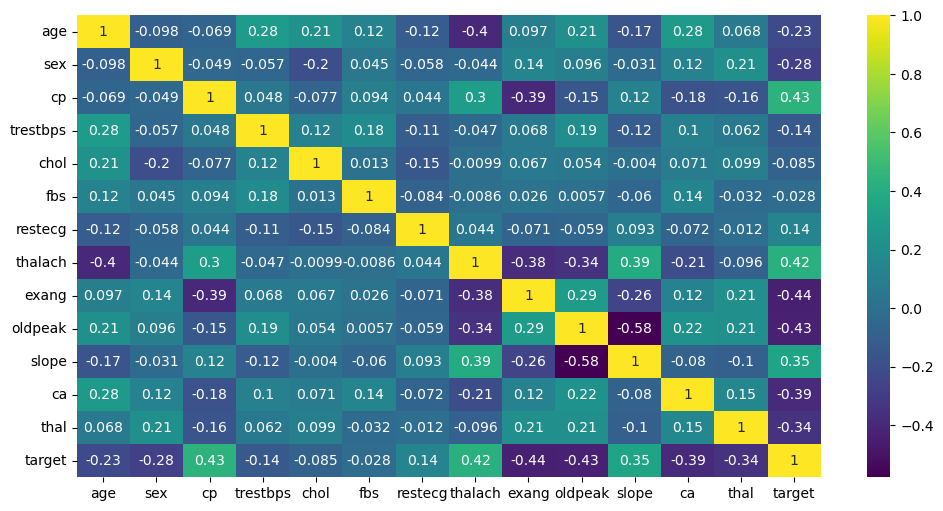

In [10]:
plt.figure(figsize = (12, 6))
sns.heatmap(data = df.corr(), annot= True,cmap='viridis')

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

In [16]:
X = df.drop('target', axis = 1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.1, random_state=101)

**С помощью объекта StandardScaler нормализуем данные признаков в обучающем и тестовом наборах данных.**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**Создадим модель логистической регрессии, и с помощью поиска по сетке найдём хорошее значение значение C и l1_ratio.**

In [19]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty = 'elasticnet', solver = 'saga')

In [20]:
from sklearn.model_selection import GridSearchCV
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
params = {'l1_ratio': l1_ratio, 'C': C}
grid_model = GridSearchCV(log_model, param_grid=params)

In [21]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='elasticnet', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])})

In [22]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.5789473684210527}

In [23]:
y_pred = grid_model.predict(scaled_X_test)

### Коэффициенты

In [17]:
grid_model.best_estimator_.coef_

array([[-0.05811401, -0.71304379,  0.89031805, -0.24901108, -0.19760397,
         0.02101038,  0.10607409,  0.42682978, -0.41679487, -0.52487156,
         0.36810763, -0.84023653, -0.56867818]])

**Сделаем визуализацию коэффициентов, нарисуя их с помощью графика barplot.**

In [24]:
bb = pd.DataFrame({'coef':grid_model.best_estimator_.coef_[0]})
bb

,coef
0,-0.058083
1,-0.713008
2,0.890436
3,-0.248917
4,-0.197468
5,0.020998
6,0.106221
7,0.426656
8,-0.416776
9,-0.524894


In [25]:
pd.Series(X.columns)

0          age
1          sex
2           cp
3     trestbps
4         chol
5          fbs
6      restecg
7      thalach
8        exang
9      oldpeak
10       slope
11          ca
12        thal
dtype: object

In [26]:
bar = pd.DataFrame({'coef':grid_model.best_estimator_.coef_[0], 'params': pd.Series(X.columns)})
bar.sort_values(inplace=True, by = 'coef')
bar

,coef,params
11,-0.840220,ca
1,-0.713008,sex
12,-0.568613,thal
9,-0.524894,oldpeak
8,-0.416776,exang
3,-0.248917,trestbps
4,-0.197468,chol
0,-0.058083,age
5,0.020998,fbs
6,0.106221,restecg


<AxesSubplot:xlabel='params', ylabel='coef'>

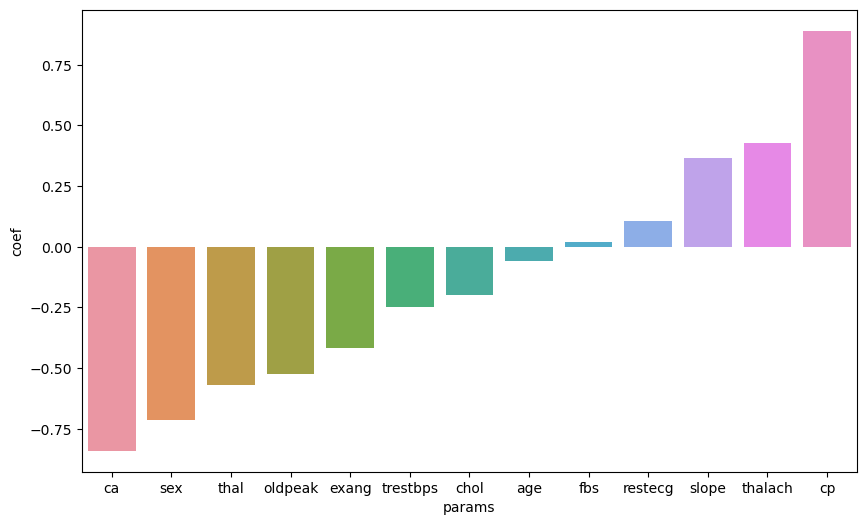

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data = bar, x = 'params', y = 'coef')

---------

## Оценка модели

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [29]:
cm = confusion_matrix(y_test, y_pred)

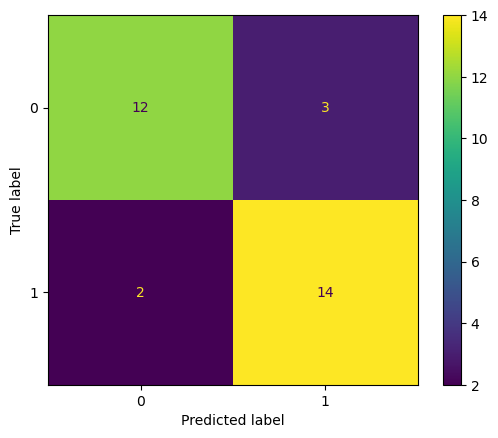

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Кривые производительности

**Нарисуем графики "precision recall curve" и "ROC Curve".**

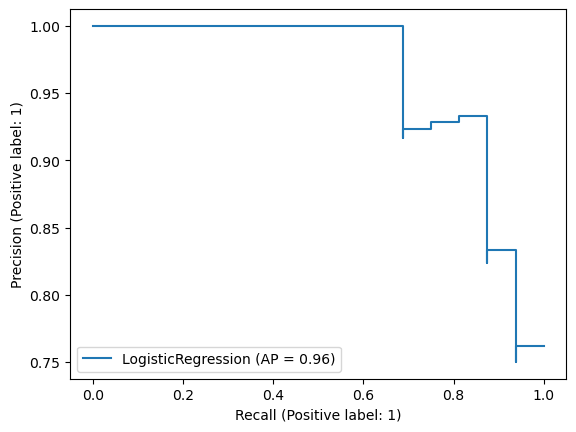

In [31]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
PrecisionRecallDisplay.from_estimator(
                  grid_model.best_estimator_, scaled_X_test, y_test)

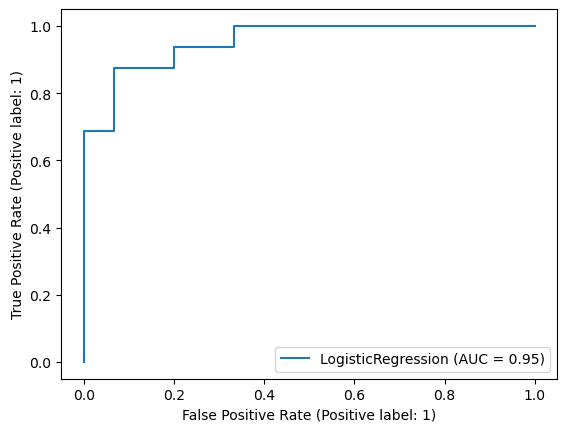

In [32]:
RocCurveDisplay.from_estimator(
                  grid_model.best_estimator_, scaled_X_test, y_test)